# PaddleHub 口罩检测示例


防控疫情，众志成城。人工智能技术正被应用到疫情防控中来。

 百度积极响应号召，为了助推全社会的力量将AI技术应用于防疫工作，决定免费开源自研的“口罩人脸识别”预训练模型，该模型基于2018年百度在国际顶级计算机视觉会议ECCV 2018的论文PyramidBox而研发，可以在公共场景检测大量的人脸同时，将佩戴口罩和未佩戴口罩的人脸快速识别标注。基于此预训练模型，开发者仅需使用少量自有数据，便可快速完成自有场景模型开发。
 
 飞桨预训练模型管理与迁移学习工具PadddleHub已提供PyramidBox预训练模型(pyramidbox_lite_mobile_mask/pyramidbox_lite_server_mask)用于一键检测人们是否佩戴口罩。同时PaddleHub还提供了飞桨生态下的高质量预训练模型，涵盖了图像分类、目标检测、词法分析、语义模型、情感分析、视频分类、图像生成、图像分割、文本审核、关键点检测等主流模型。更多模型详情请查看官网：https://www.paddlepaddle.org.cn/hub 和 PaddleHub repo：https://github.com/PaddlePaddle/PaddleHub 
 

本示例利用目标检测轻量化模型pyramidbox_lite_mobile_mask完成佩戴口罩检测。

**NOTE：** 如果您在本地运行该项目示例，需要首先安装PaddleHub。如果您在线运行，需要首先fork该项目示例。之后按照该示例操作即可。

In [ ]:
'''
在线安装PaddleHub
'''
!pip install --upgrade paddlehub -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 215kB 18.5MB/s eta 0:00:01
  Found existing installation: paddlehub 1.5.0
    Uninstalling paddlehub-1.5.0:
      Successfully uninstalled paddlehub-1.5.0


## 一、定义待预测数据


以数据集文件夹下test_mask_detection.png为待预测图片

In [2]:
#!unzip /home/aistudio/data/data25505/detection.zip

Archive:  /home/aistudio/data/data25505/detection.zip
replace detection/test_mask_detection.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


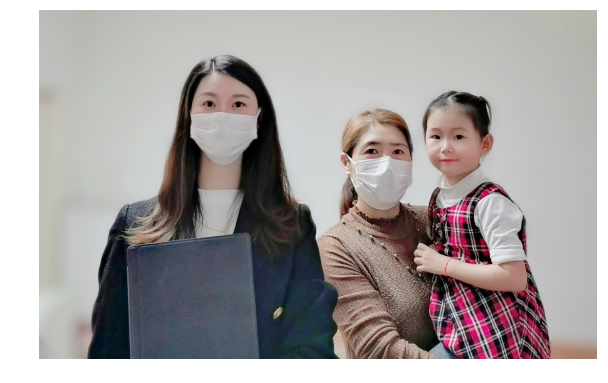

In [8]:


import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

# 待预测图片
test_img_path = ["/home/aistudio/detection/test_mask_detection.jpg"]
img = mpimg.imread(test_img_path[0]) 

# 展示待预测图片
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

若是待预测图片存放在一个文件中，如左侧文件夹所示的test.txt。每一行是待预测图片的存放路径。

In [4]:
!cat /home/aistudio/detection/test.txt

/home/aistudio/detection/test_mask_detection.jpg

用户想要利用完成对该文件的口罩检测，只需读入该文件，将文件内容存成list，list中每个元素是待预测图片的存放路径。

In [5]:
with open('detection/test.txt', 'r') as f:
    test_img_path=[]
    for line in f:
        test_img_path.append(line.strip())
print(test_img_path)

['/home/aistudio/detection/test_mask_detection.jpg']


## 二、加载预训练模型

PaddleHub口罩检测提供了两种预训练模型，[pyramidbox_lite_mobile_mask](https://www.paddlepaddle.org.cn/hubdetail?name=pyramidbox_lite_mobile_mask&en_category=ObjectDetection)和[pyramidbox_lite_server_mask](https://www.paddlepaddle.org.cn/hubdetail?name=pyramidbox_lite_server_mask&en_category=ObjectDetection)。不同点在于，pyramidbox_lite_mobile_mask是针对于移动端优化过的模型，适合部署于移动端或者边缘检测等算力受限的设备上。

In [6]:
import paddlehub as hub

module = hub.Module(name="pyramidbox_lite_mobile_mask")
# module = hub.Module(name="pyramidbox_lite_server_mask")

[2020-03-20 19:17:18,815] [    INFO] - Installing pyramidbox_lite_mobile_mask module


[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmpejfqd2s1/pyramidbox_lite_mobile_mask
[==================================================] 100.00%


[2020-03-20 19:17:20,947] [    INFO] - Successfully installed pyramidbox_lite_mobile_mask-1.2.0
[2020-03-20 19:17:21,054] [    INFO] - Installing pyramidbox_lite_mobile module


[==================================================] 100.00%
Uncompress /home/aistudio/.paddlehub/tmp/tmpw76_shxb/pyramidbox_lite_mobile
[==================================================] 100.00%


[2020-03-20 19:17:21,431] [    INFO] - Successfully installed pyramidbox_lite_mobile-1.1.1


## 三、预测


PaddleHub对于支持一键预测的module，可以调用module的相应预测API，完成预测功能。

[2020-03-20 19:17:25,402] [    INFO] - 133 pretrained paramaters loaded by PaddleHub
[2020-03-20 19:17:25,469] [    INFO] - 149 pretrained paramaters loaded by PaddleHub


image with bbox drawed saved as /home/aistudio/detection_result/test_mask_detection.jpg
{'data': {'label': 'MASK', 'left': 459.0687048435211, 'right': 657.8806104660034, 'top': 191.39037430286407, 'bottom': 444.0621703863144, 'confidence': 0.99913305}, 'id': 1, 'path': '/home/aistudio/detection/test_mask_detection.jpg'}
{'data': {'label': 'NO MASK', 'left': 1166.9745614528656, 'right': 1323.218990802765, 'top': 294.5009618997574, 'bottom': 500.64271688461304, 'confidence': 0.99955636}, 'id': 1, 'path': '/home/aistudio/detection/test_mask_detection.jpg'}
{'data': {'label': 'MASK', 'left': 942.4126571416855, 'right': 1127.8870369195938, 'top': 340.60501903295517, 'bottom': 585.9683722257614, 'confidence': 0.94331}, 'id': 1, 'path': '/home/aistudio/detection/test_mask_detection.jpg'}
{'data': {'label': 'NO MASK', 'left': 1237.7968076467514, 'right': 1443.2840930223465, 'top': 815.3819382190704, 'bottom': 1055.2424848079681, 'confidence': 0.54464865}, 'id': 1, 'path': '/home/aistudio/detec

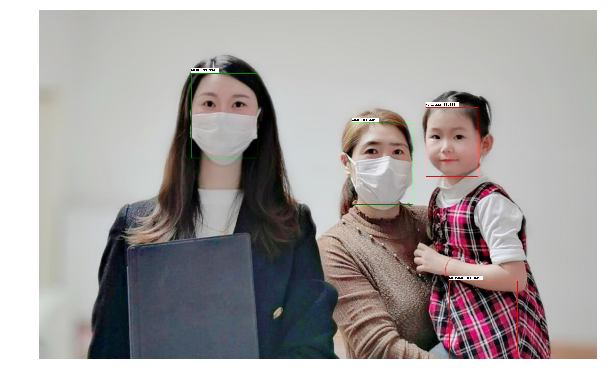

In [7]:
input_dict = {"image": test_img_path}

# 口罩检测预测
results = module.face_detection(data=input_dict)
for result in results:
    print(result)

# 预测结果展示
img = mpimg.imread("detection_result/test_mask_detection.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()



上一步骤的输出结果，有三条数据：
```
{'data': {'label': 'MASK', 'left': 457.5789153575897, 'right': 654.8277450799942, 'top': 182.25817680358887, 'bottom': 440.94200134277344, 'confidence': 0.8900112}, 'id': 1}
{'data': {'label': 'MASK', 'left': 945.8848892450333, 'right': 1125.7660418748856, 'top': 340.7917723059654, 'bottom': 578.5958737134933, 'confidence': 0.99627507}, 'id': 1}
{'data': {'label': 'NO MASK', 'left': 1166.5987054109573, 'right': 1323.4498780965805, 'top': 292.07742512226105, 'bottom': 500.40101408958435, 'confidence': 0.9576567}, 'id': 1}
```

其中，label有'MASK'和'NO MASK'两种选择：'MASK'表示戴了口罩，'NO MASK表示没有佩戴口罩。'left'/'rigth'/'top'/'bottom'表示口罩在图片当中的位置。'confidence'表示预测为佩戴口罩'MASK'或者不佩戴口罩'NO MASK'的概率大小。
